In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
geniusLyrics = pd.read_csv('lyricGenius.csv')
spotifyFeatures = pd.read_csv('filtered_tracks_with_features.csv',encoding = "ISO-8859-1")

In [12]:
geniusLyrics.head()

,Unnamed: 0,index,Track Name,Artist,lyricsGenius
0,0,771622,Bad and Boujee (feat. Lil Uzi Vert),Migos,"\n\n[Intro: Offset]\nYou know, young rich nigg..."
1,1,771623,Fake Love,Drake,"\n\n[Chorus]\nI've been down so long, it look ..."
2,2,771624,Starboy,The Weeknd,\n\n[Verse 1]\nI'm tryna put you in the worst ...
3,3,771625,Closer,The Chainsmokers,"\n\n[Verse 1: Andrew Taggart]\nHey, I was doin..."
4,4,771626,Black Beatles,Rae Sremmurd,\n\n[Intro: Swae Lee & Gucci Mane]\nBlack Beat...


In [ ]:
spotifyFeatures

In [43]:
song = pd.read_csv('data.csv')

In [44]:
top10Countries = song.groupby('Region')['Streams'].mean().reset_index().sort_values('Streams',ascending=False).reset_index()['Region'][1:10]

In [9]:
top10Countries

1    us
2    gb
3    br
4    mx
5    de
6    es
7    nl
8    au
9    se
Name: Region, dtype: object

In [45]:
song_top10 = pd.DataFrame([x for i,x in song.iterrows() if x['Region'] in np.array(top10Countries)])

In [46]:
song_top10

,Position,Track Name,Artist,Streams,URL,Date,Region
771622,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2017-01-01,us
771623,2,Fake Love,Drake,1180074,https://open.spotify.com/track/343YBumqHu19cGo...,2017-01-01,us
771624,3,Starboy,The Weeknd,1064351,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,us
771625,4,Closer,The Chainsmokers,1010492,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,us
771626,5,Black Beatles,Rae Sremmurd,874289,https://open.spotify.com/track/6fujklziTHa8uoM...,2017-01-01,us
771627,6,Broccoli (feat. Lil Yachty),DRAM,763259,https://open.spotify.com/track/7yyRTcZmCiyzzJl...,2017-01-01,us
771628,7,One Dance,Drake,753150,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,us
771629,8,Caroline,Aminé,714839,https://open.spotify.com/track/7FB8l7UA1HKqnuS...,2017-01-01,us
771630,9,Let Me Love You,DJ Snake,690483,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,us
771631,10,Bounce Back,Big Sean,682688,https://open.spotify.com/track/0SGkqnVQo9KPytS...,2017-01-01,us


In [3]:
## clean genius lyrics
geniusLyricsFil = geniusLyrics[geniusLyrics['lyricsGenius'] != 'Err']

In [54]:
spotifyFeatures = spotifyFeatures.drop_duplicates(['Track Name','Artist'])

In [131]:
geniusLyricsFil.drop(['index','Unnamed: 0'],1).reset_index().drop('index',1).to_csv('filteredGeniusLyrics5540.csv')

In [243]:
songMetadata = geniusLyricsFil.reset_index(drop=True).merge(spotifyFeatures.drop_duplicates(['Track Name','Artist']),on=['Track Name','Artist']).drop(['lyricsGenius',
                                                                                  'Unnamed: 0_x',
                                                                                  'Unnamed: 0_y','URL','id','index'],axis=1)

In [ ]:
#geniusLyricsFil.drop_duplicates(['Track Name','Artist'])
songMetadata.isnull().sum()

In [245]:
#sum(songMetadata.instrumentalness == 0)
#pd.Series(np.log(songMetadata.instrumentalness + 1e-6)).hist()
key_oh =pd.get_dummies(songMetadata.key)
ohc = key_oh.columns
ohc = ['is_key_%d'%c for c in ohc]
key_oh.columns = ohc
songMetadata = pd.concat([songMetadata,key_oh],1)
songMetadata = songMetadata.drop('key',axis=1)

In [251]:
songMetadata.to_csv('songMetadata.csv')

In [4]:
def filterSongLyric(lyric,wordArr):
    for word in wordArr:
        lyric = lyric.replace(word,'')
    return lyric

In [5]:
wordArr = ['Intro','\n','\\',"\'",'Verse','[',']','Chorus','Intro']

In [6]:
doc_lyr_initial = [filterSongLyric(x,wordArr) for x in geniusLyricsFil['lyricsGenius']]

## LDA TEST

In [9]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [ ]:
import nltk
nltk.download()

In [72]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
stop = stop
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_lyr_initial]

In [ ]:
! pip install gensim

In [73]:
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [74]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=7, id2word = dictionary, passes=50)

[(3, 0.9961006)]

In [100]:
len(doc_clean)

5540

# DTM PCA

In [202]:
dtm = np.array([np.array(v) for v in doc_term_matrix])

In [203]:
dtm.shape

(5540,)

In [204]:
from sklearn.feature_extraction.text import CountVectorizer

In [205]:
vectorizer = CountVectorizer(decode_error = 'ignore', stop_words = 'english',min_df = 8)

In [206]:
X = vectorizer.fit_transform(doc_lyr_initial).toarray()

In [116]:
Xv = vectorizer.fit_transform(doc_lyr_initial)

In [207]:
X.shape

(5540, 9030)

In [16]:
np.save('DTM_lyr.npy',X)

In [208]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 1000)

In [ ]:
pca_fitmod = pca_model.fit(X)

In [43]:
variance = pca_fitmod.explained_variance_ratio_ #calculate variance ratios                                        
cv=np.cumsum(np.round(pca_model.explained_variance_ratio_,decimals=3)*100)

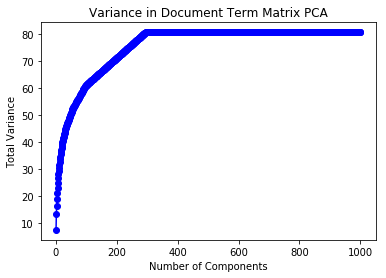

In [47]:
plt.plot(range(1,1001),cv, c='blue', marker='o')
plt.title('Variance in Document Term Matrix PCA')
plt.ylabel('Total Variance')
plt.xlabel('Number of Components')
#plt.show()
plt.savefig('VarianceDTM.png')



In [210]:
pca_model = PCA(n_components = 300)
pca_fitmod = pca_model.fit(X)
pca_x = pca_fitmod.fit_transform(X)

In [212]:
pca_xd = pd.DataFrame(pca_x)
pccol = ['pca_feat_%d'%c for c in pca_xd.columns]
pca_xd.columns = pccol

In [217]:
pca_dtm = pd.concat([geniusLyricsFil.reset_index().drop(['index',\
                                                        'Unnamed: 0'],1),pca_xd],1).drop('lyricsGenius',1)

In [219]:
pca_dtm.to_csv('pca_dtm.csv')

## KMEANS LDA

In [65]:
# X can still be used
def KMeansTest(data):
    res = []
    for i in range(1,11):
        km = KMeans(i,'random', max_iter=300, random_state=0, n_init=30)
        km_fit = km.fit(data)
        res.append(km_fit.inertia_)
    return res

In [66]:
from sklearn.cluster import KMeans

In [67]:
distortion = KMeansTest(X)

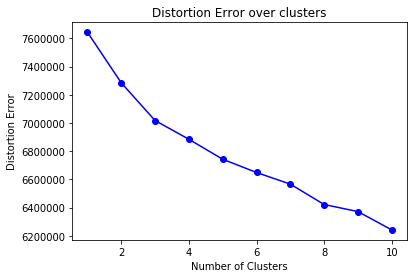

In [70]:
plt.plot(range(1,11),distortion, c='blue', marker='o')
plt.title('Distortion Error over clusters')
plt.ylabel('Distortion Error')
plt.xlabel('Number of Clusters')
plt.savefig('DistortionErr.png')

In [80]:
# 7 is the magic number
#LDA sklearn
from sklearn.decomposition import LatentDirichletAllocation

In [81]:
lda = LatentDirichletAllocation(n_components=7)

In [84]:
ldaFit = lda.fit(X)

/opt/conda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [86]:
pred = ldaFit.transform(X)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] \
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(ldaFit, vectorizer.get_feature_names(), 10)


In [91]:
topicList = np.argmax(pred,1)

In [104]:
# convert to dataframe and add
topicCategories = pd.get_dummies(topicList)

In [122]:
topicCol = ['love','Uncertainty','Explictives','German','Swedish','Dutch','Spanish']
topicCategories.columns = topicCol

In [220]:
lda_top = pd.concat([geniusLyricsFil.reset_index().drop(['index',\
                                                        'Unnamed: 0'],1),topicCategories],1).drop('lyricsGenius',1)

In [222]:
lda_top = lda_top.drop(['level_0'],1)

In [223]:
lda_top.to_csv('ldaTop.csv')

## Google Word Vec

In [132]:
! pip install word2vec

    100% |████████████████████████████████| 61kB 834kB/s ta 0:00:01    59% |███████████████████             | 30kB 680kB/s eta 0:00:01
  Running setup.py bdist_wheel for word2vec ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/89/a1/cb/417bcc7143a3e2befcc82da185ce8ad4a340eb82c0bf48969c
Successfully built word2vec
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [133]:
import word2vec

In [141]:
from gensim.models import Word2Vec


In [144]:
sentences = [['first', 'sentence'], ['second', 'sentence']]

In [157]:
# build sentences
lyr_filter = pd.read_csv('filteredGeniusLyrics5540.csv')
lyr_filter= lyr_filter.drop('lyricsGenius',1)

In [177]:
artistSentence = [str(x).split() for x in lyr_filter['Artist']]
trackSentence = [str(x).split() for x in lyr_filter['Track Name']]

In [179]:
artmodel = Word2Vec(artistSentence, min_count=1,size=300)

In [180]:
trackmodel = Word2Vec(trackSentence, min_count=1,size=100)

In [193]:
def getVectorForSentence(sent,mod):
    cum = np.zeros(100)
    for word in sent:
        cum += mod[word]
    return cum
        

In [183]:
artTotal = []
for x in lyr_filter['Artist']:
    artTotal.append(getVectorForSentence(str(x).split(),artmodel))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [186]:
artTotalDf = pd.DataFrame(artTotal)

In [188]:
artcolname = ['art_feat_%d'%(c) for c in range(300)]
artTotalDf.columns = artcolname

In [190]:
wordVecFeaturesDf = pd.concat([lyr_filter,artTotalDf],1)

In [194]:
trackTotal = []
for x in lyr_filter['Track Name']:
    trackTotal.append(getVectorForSentence(str(x).split(),trackmodel))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [196]:
tracktotalDf = pd.DataFrame(trackTotal)
trackcolname = ['track_feat_%d'%(c) for c in range(100)]
tracktotalDf.columns = trackcolname

In [198]:
wordVecFeaturesDf = pd.concat([wordVecFeaturesDf,tracktotalDf],1)

In [200]:
wordVecFeaturesDf.to_csv('wordVecFeatures.csv')